In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
x = df.iloc [:,0:8].values
y = df.iloc [:,8].values

In [3]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = .20, random_state = 0)



In [4]:
from sklearn.tree import DecisionTreeClassifier
#decision_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3,random_state = 100)
#decision_tree.fit(X_train, y_train)
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=2)
decision_tree.fit(x_train, y_train)
predictValues =decision_tree.predict(x_test)

predictValues




array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [5]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")
print(np.sqrt(metrics.mean_squared_error(y_test, predictValues)))


RMSE is:-
0.4901629731627434


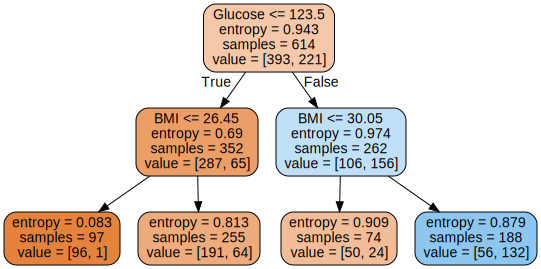

In [10]:
data_feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(tree.export_graphviz(decision_tree, out_file=None ,feature_names=data_feature_names , filled = True,rounded=True))
display(SVG(graph.pipe(format='svg')))